### Porto Seguro 

3rd Largest Insurance Company in Brasil

---

__Goal__ - To produce the likelyhood a driver will initiate an insurance claim.

__Notes__ 
- Though this is an insurance claim problem, the data is anonomyzed in such a way that no features are known. Therefore, there is no 'domain expertise' easily used to construct features unless there is a labeled dataset somewhere you could compare.
- Classes are highly imbalanced


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import *
import itertools
#import fancyimpute

%matplotlib inline

Similar features in 4 categories: 

    ind, reg, car, calc.

Feature types:

    bin = binary, cat = categorical, unspecified = continuous or ordinal

Functions

In [268]:
def rename_cols(train):
    cat_cols = []
    bin_cols = []
    ord_cont_cols = []
    for col in train.columns:
        if 'cat' in col:
            cat_cols.append(col)
        elif 'bin' in col:
            bin_cols.append(col)
        elif 'target' in col or 'id' in col:
            pass
        else:
            ord_cont_cols.append(col)

    cont_cols = []
    ord_cols = []

    for col in ord_cont_cols:
        if train[col].dtype == 'int64':
            #print(col)
            train['{}_ord'.format(col)] = train[col]
            train.drop(col,axis=1,inplace=True)
            ord_cols.append('{}_ord'.format(col))
        else:
            cont_cols.append(col)

    ind_cols = []
    reg_cols = []
    car_cols = []
    calc_cols = []
    for col in train.columns:
        if 'ind' in col:
            ind_cols.append(col)
        if 'reg' in col:
            reg_cols.append(col)
        if 'car' in col:
            car_cols.append(col)
        if 'calc' in col:
            calc_cols.append(col)
    return train

In [357]:
def transform_df(train):
    calc_cols = [col for col in train.columns[train.columns.str.contains('calc')]]
    train = train.drop(calc_cols,axis=1)
    return train

#     train = train.replace(-1,np.NaN)
#     bin_cols = [col for col in train_na.columns[train_na.columns.str.contains('bin')]]
#     cat_cols = [col for col in train_na.columns[train_na.columns.str.contains('cat')]]
#     ord_cols = [col for col in train_na.columns[train_na.columns.str.contains('ord')]]
#     bin_cat_train_na = train_na[bin_cols+cat_cols+ord_cols]  
#     from fancyimpute import SimpleFill
#     bin_cat_train_na_cols = bin_cat_train_na.columns
#     bin_cat_train_na = pd.DataFrame(SimpleFill(fill_method='median').complete(bin_cat_train_na.as_matrix()),columns=bin_cat_train_na_cols)
#     cont_train_na = train_na.drop(bin_cols+cat_cols+ord_cols,axis=1)
#     cont_train_na_cols = cont_train_na.columns
#     cont_train_na = pd.DataFrame(SimpleFill().complete(cont_train_na.as_matrix()),columns=cont_train_na_cols)
#     train_na_mean_imputed = pd.concat([cont_train_na,bin_cat_train_na],axis=1)
    
    return train

In [330]:
def split_data(train, keep_cols=False):
    x, y = train.drop(['id','target'],axis=1), train['target']
    if keep_cols:
        x = x[keep_cols]
    x_train, x_valid, y_train, y_valid = model_selection.train_test_split(x, y, test_size=.2)
    return x_train, x_valid, y_train, y_valid, x, y

In [335]:
def cross_val_model(clf,splits=5):
    #kfold = model_selection.KFold(n_splits=splits, random_state=1)
    stratkfold = model_selection.StratifiedKFold(n_splits=splits,shuffle=True,random_state=1)
    score = model_selection.cross_val_score(clf,x_train,y_train,scoring='roc_auc',cv=stratkfold)
    return 2*np.mean(score)-1

In [294]:
def create_submission(rf,test,filename):
    X_test = test.drop(['id'],axis=1)
    test['target'] = rf.predict_proba(X_test)[:,1]
    test[['id','target']].to_csv('./submissions/'+filename+'.csv',index=False, float_format='%.5f')

In [442]:
test = pd.read_csv('./data/test.csv')
test['id'] = test['id'].astype(int)
train = pd.read_csv('./data/train.csv')

In [443]:
test = rename_cols(test)
train = rename_cols(train)

In [444]:
train = transform_df(train)
test = transform_df(test)

In [445]:
ps_car_09_cat_mappings = {}
ps_car_09_cat_mappings[4] = 1
ps_car_09_cat_mappings[3] = 1
ps_car_09_cat_mappings[2] = 1
ps_car_09_cat_mappings[1] = 1
ps_car_09_cat_mappings[0] = 0
ps_car_09_cat_mappings[-1] = 1

In [446]:
train['ps_car_09_cat_bin'] = train['ps_car_09_cat'].replace(ps_car_09_cat_mappings)
test['ps_car_09_cat_bin'] = test['ps_car_09_cat'].replace(ps_car_09_cat_mappings)

In [447]:
ps_car_07_cat_mappings = {}
ps_car_07_cat_mappings[1] = 0
ps_car_07_cat_mappings[0] = 1
ps_car_07_cat_mappings[-1] = 1

In [448]:
train['ps_car_07_cat_bin'] = train['ps_car_07_cat'].replace(ps_car_07_cat_mappings)
test['ps_car_07_cat_bin'] = test['ps_car_07_cat'].replace(ps_car_07_cat_mappings)

In [449]:
ps_car_05_cat_mappings = {}
ps_car_05_cat_mappings[1] = 1
ps_car_05_cat_mappings[0] = 1
ps_car_05_cat_mappings[-1] = 0

In [450]:
train['ps_car_05_cat_bin'] = train['ps_car_05_cat'].replace(ps_car_05_cat_mappings)
test['ps_car_05_cat_bin'] = test['ps_car_05_cat'].replace(ps_car_05_cat_mappings)

In [451]:
ps_car_03_cat_mappings = {}
ps_car_03_cat_mappings[1] = 1
ps_car_03_cat_mappings[0] = 1
ps_car_03_cat_mappings[-1] = 0

In [452]:
train['ps_car_03_cat_bin'] = train['ps_car_03_cat'].replace(ps_car_03_cat_mappings)
test['ps_car_03_cat_bin'] = test['ps_car_03_cat'].replace(ps_car_03_cat_mappings)

In [453]:
train = train.drop(['ps_car_09_cat','ps_car_07_cat','ps_car_05_cat','ps_car_03_cat'],axis=1)
test = test.drop(['ps_car_09_cat','ps_car_07_cat','ps_car_05_cat','ps_car_03_cat'],axis=1)

overfit like whoa, .289 but .202 on lb

In [420]:
mappings = (train.groupby(['ps_reg_03'])['target'].describe()
            .unstack()[['mean']] > .04).astype(np.int).unstack().unstack()

ps_reg_03_mappings = {}
for val in mappings.columns:
    ps_reg_03_mappings[val] = mappings[val]['mean']

In [421]:
train['ps_reg_03_bin'] = train['ps_reg_03'].replace(ps_reg_03_mappings)
test['ps_reg_03_bin'] = test['ps_reg_03'].replace(ps_reg_03_mappings)

try wtih a count constraint

In [455]:
mean_mappings = (train.groupby(['ps_reg_03'])['target'].describe()
            .unstack()[['mean']] > .05).astype(np.int).unstack().unstack()

ps_reg_03_mean_mappings = {}
for val in mean_mappings.columns:
    ps_reg_03_mean_mappings[val] = mean_mappings[val]['mean']

train['ps_reg_03_mean'] = train['ps_reg_03'].replace(ps_reg_03_mean_mappings)
test['ps_reg_03_mean'] = test['ps_reg_03'].replace(ps_reg_03_mean_mappings)

count_mappings = (train.groupby(['ps_reg_03'])['target'].describe()
            .unstack()[['count']] > 30).astype(np.int).unstack().unstack()

ps_reg_03_count_mappings = {}
for val in count_mappings.columns:
    ps_reg_03_count_mappings[val] = count_mappings[val]['count']

train['ps_reg_03_count'] = train['ps_reg_03'].replace(ps_reg_03_count_mappings)
test['ps_reg_03_count'] = test['ps_reg_03'].replace(ps_reg_03_count_mappings)

In [456]:
def reg_03(row):
    if row['ps_reg_03_count'] == 1 and row['ps_reg_03_mean'] == 1:
        return 1
    else:
        return 0

train['ps_reg_03_bin'] = train.apply(reg_03,axis=1)
test['ps_reg_03_bin'] = test.apply(reg_03,axis=1)

In [457]:
train = train.drop(['ps_reg_03_mean','ps_reg_03_count','ps_reg_03'],axis=1)
test = test.drop(['ps_reg_03_mean','ps_reg_03_count','ps_reg_03'],axis=1)

without dropping original mapping cols .2489 cv, .243 lb

with dropping + add ps_reg_03_bin 

In [458]:
x_train, x_valid, y_train, y_valid, x, y = split_data(train)
lr = linear_model.LogisticRegression(penalty='l1',C=10)
cross_val_model(lr)

0.2736245013397518

In [464]:
lr.fit(x,y)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [471]:
test = test.drop(['target'],axis=1)

In [467]:
create_submission(lr,test,'lr.2736')

In [460]:
x_train, x_valid, y_train, y_valid, x, y = split_data(train)
rf = ensemble.RandomForestClassifier(n_estimators=400, min_samples_leaf=2, min_samples_split=4, max_depth=8)
cross_val_model(rf)

0.28511027983689696

In [461]:
rf.fit(x,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=8, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=2,
            min_samples_split=4, min_weight_fraction_leaf=0.0,
            n_estimators=400, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [472]:
test.columns

Index(['id', 'ps_ind_02_cat', 'ps_ind_04_cat', 'ps_ind_05_cat',
       'ps_ind_06_bin', 'ps_ind_07_bin', 'ps_ind_08_bin', 'ps_ind_09_bin',
       'ps_ind_10_bin', 'ps_ind_11_bin', 'ps_ind_12_bin', 'ps_ind_13_bin',
       'ps_ind_16_bin', 'ps_ind_17_bin', 'ps_ind_18_bin', 'ps_reg_01',
       'ps_reg_02', 'ps_car_01_cat', 'ps_car_02_cat', 'ps_car_04_cat',
       'ps_car_06_cat', 'ps_car_08_cat', 'ps_car_10_cat', 'ps_car_11_cat',
       'ps_car_12', 'ps_car_13', 'ps_car_14', 'ps_car_15', 'ps_ind_01_ord',
       'ps_ind_03_ord', 'ps_ind_14_ord', 'ps_ind_15_ord', 'ps_car_11_ord',
       'ps_car_09_cat_bin', 'ps_car_07_cat_bin', 'ps_car_05_cat_bin',
       'ps_car_03_cat_bin', 'ps_reg_03_bin'],
      dtype='object')

In [463]:
create_submission(rf,test,'rf.2851')

In [474]:
rf_pred = rf.predict(test.drop(['id'],axis=1))

---

Looking into bayesian optimization for gridsearch of xgboost params:

https://www.kaggle.com/tilii7/bayesian-optimization-xgboost-parameters

In [485]:
import xgboost as xgb

In [486]:
# Define the gini metric - from https://www.kaggle.com/c/ClaimPredictionChallenge/discussion/703#5897
def gini(actual, pred, cmpcol = 0, sortcol = 1):
    assert( len(actual) == len(pred) )
    all = np.asarray(np.c_[ actual, pred, np.arange(len(actual)) ], dtype=np.float)
    all = all[ np.lexsort((all[:,2], -1*all[:,1])) ]
    totalLosses = all[:,0].sum()
    giniSum = all[:,0].cumsum().sum() / totalLosses
    
    giniSum -= (len(actual) + 1) / 2.
    return giniSum / len(actual)
 
def gini_normalized(a, p):
    return gini(a, p) / gini(a, a)

def gini_xgb(preds, dtrain):
    labels = dtrain.get_label()
    gini_score = gini_normalized(labels, preds)
    return 'gini', gini_score

In [487]:
X = train.drop(['id','target'],axis=1).as_matrix()
y = train['target'].as_matrix()

In [497]:
sub = pd.DataFrame()
sub['id'] = test['id']
sub['target'] = np.zeros_like(test['id'])

In [505]:
params = {}
params['objective'] = 'binary:logistic'
params['eta'] = 0.02
params['silent'] = True
params['max_depth'] = 6
params['subsample'] = 0.9
params['colsample_bytree'] = 0.9

In [495]:
params = {
    'min_child_weight': 10.0,
    'objective': 'binary:logistic',
    'max_depth': 7,
    'max_delta_step': 1.8,
    'colsample_bytree': 0.4,
    'subsample': 0.8,
    'eta': 0.025,
    'gamma': 0.65,
    'num_boost_round' : 700
    }

In [507]:
kfold = 2
skf = model_selection.StratifiedKFold(n_splits=kfold, random_state=1)
for i, (train_index, test_index) in enumerate(skf.split(X, y)):
    print('kfold: {}/{}: '.format(i+1, kfold))
    X_train, X_valid = X[train_index], X[test_index]
    y_train, y_valid = y[train_index], y[test_index]

    d_train = xgb.DMatrix(X_train, y_train)
    d_valid = xgb.DMatrix(X_valid, y_valid)
    d_test = xgb.DMatrix(test.values)
    watchlist = [(d_train, 'train'), (d_valid, 'valid')]
    
    mdl = xgb.train(params, d_train, 1600, watchlist, early_stopping_rounds=70, feval=gini_xgb, maximize=True, verbose_eval=100)
    
    print('[kfold {}/{} pred:]'.format(i+1, kfold))
    # Predict on our test data
    p_test = mdl.predict(d_test)
    sub['target'] += p_test/kfold

kfold: 1/2: 
[0]	train-error:0.036414	valid-error:0.036498	train-gini:0.232898	valid-gini:0.231098
Multiple eval metrics have been passed: 'valid-gini' will be used for early stopping.

Will train until valid-gini hasn't improved in 70 rounds.
[100]	train-error:0.036434	valid-error:0.036448	train-gini:0.306642	valid-gini:0.277346
[200]	train-error:0.036437	valid-error:0.036448	train-gini:0.345657	valid-gini:0.288792
[300]	train-error:0.036427	valid-error:0.036444	train-gini:0.397472	valid-gini:0.298438
[400]	train-error:0.036407	valid-error:0.036448	train-gini:0.435936	valid-gini:0.301508
[500]	train-error:0.0364	valid-error:0.036454	train-gini:0.467313	valid-gini:0.302438
[600]	train-error:0.036387	valid-error:0.036454	train-gini:0.492821	valid-gini:0.302035
Stopping. Best iteration:
[557]	train-error:0.03639	valid-error:0.036454	train-gini:0.482886	valid-gini:0.302636

[kfold 1/2 pred:]
kfold: 2/2: 
[0]	train-error:0.0364	valid-error:0.036542	train-gini:0.234326	valid-gini:0.225861
M

In [500]:
sub.to_csv('./submissions/xgboost.2.csv', index=False)

In [502]:
test[['id','target']]

KeyError: "['target'] not in index"

In [501]:
sub

,id,target
0,0,0.123008
1,1,0.068704
2,2,0.046837
3,3,0.130960
4,4,0.090038
5,5,0.164411
6,6,0.060139
7,8,0.183069
8,10,0.196034
9,11,0.052798


---

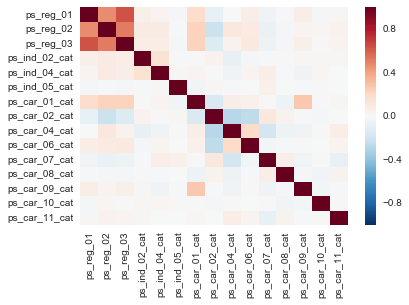

In [370]:
sns.heatmap(train[reg_cols+cat_cols].corr())

In [326]:
cols = train.columns[2:]

single_col_lr = []
for col in cols[:10]:
    x_train, x_valid, y_train, y_valid, x, y = split_data(train,[col])
    single_col_lr.append((col,cross_val_model(lr,splits=10)))

single_col_lr.sort(key=lambda tup: tup[1],reverse=True)
top_single_col_lr = [col[0] for col in single_col_lr if col[1] > .03]

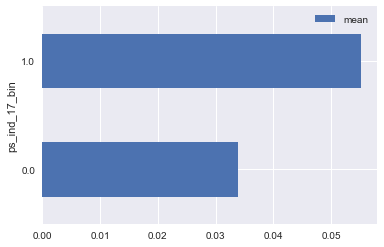

In [215]:
train.groupby('ps_ind_17_bin')['target'].describe().unstack()[['mean']].plot(kind='barh')

Create one hot columns for all categorical

In [168]:
def create_onehot(train):
    onehot_cols = []
    for col in [col for col in train.columns[train.columns.str.contains('cat')]]:
        onehot = pd.get_dummies(train[col],prefix=col,dummy_na=np.NaN)
        for new_col in onehot.columns:
            onehot_cols.append(new_col)
        train.drop(col,axis=1,inplace=True)
        train = pd.concat([train,onehot],axis=1)
    return train

In [112]:
#train_na_mean_imputed = create_onehot(train_na_mean_imputed)

In [169]:
[col for col in train_na_mean_imputed.columns[train_na_mean_imputed.columns.str.contains('cat')]]

['ps_ind_02_cat',
 'ps_ind_04_cat',
 'ps_ind_05_cat',
 'ps_car_01_cat',
 'ps_car_02_cat',
 'ps_car_04_cat',
 'ps_car_06_cat',
 'ps_car_07_cat',
 'ps_car_08_cat',
 'ps_car_09_cat',
 'ps_car_10_cat',
 'ps_car_11_cat']

Create function to transform

### Notes:

    create bins for ps_car_11_cat

In [171]:
x_train, x_valid, y_train, y_valid, x, y = split_data(train_na_mean_imputed)

In [123]:
# rf = ensemble.RandomForestClassifier(n_estimators=200, min_samples_leaf=15, min_samples_split=20)
# rf_cv_score = cross_val_model(rf)
# rf_cv_score

In [ ]:
rf = ensemble.RandomForestClassifier(n_estimators=400, min_samples_leaf=15, min_samples_split=20)
rf.fit(x, y)

In [138]:
create_submission(rf)

ValueError: Number of features of the model must match the input. Model n_features is 206 and input n_features is 212 

In [130]:
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_],axis=0)
indices = np.argsort(importances)[::-1]

In [133]:
sorted_importance_cols = []
#sorted_importance_cols = {}
for f,col in enumerate(x.columns):
#    sorted_importance_cols[col] = importances[indices[f]]
    sorted_importance_cols.append((col,importances[indices[f]]))

In [134]:
sorted_importance_cols

[('ps_reg_01', 0.10658066591619761),
 ('ps_reg_02', 0.093383819870742998),
 ('ps_reg_03', 0.070062534068123364),
 ('ps_car_12', 0.058884348373882588),
 ('ps_car_13', 0.056569355410262492),
 ('ps_car_14', 0.054727804323040606),
 ('ps_car_15', 0.042704216502288686),
 ('ps_ind_06_bin', 0.04228204491314444),
 ('ps_ind_07_bin', 0.040837519776046827),
 ('ps_ind_08_bin', 0.034832856410676939),
 ('ps_ind_09_bin', 0.01656286779447063),
 ('ps_ind_10_bin', 0.013711842720273456),
 ('ps_ind_11_bin', 0.01236392687272617),
 ('ps_ind_12_bin', 0.01136545081459636),
 ('ps_ind_13_bin', 0.01100525246792841),
 ('ps_ind_16_bin', 0.010956702377614194),
 ('ps_ind_17_bin', 0.010726976524654168),
 ('ps_ind_18_bin', 0.01068722152916921),
 ('ps_ind_01_ord', 0.010398372449672802),
 ('ps_ind_03_ord', 0.0097222815697552215),
 ('ps_ind_14_ord', 0.0091954215271232223),
 ('ps_ind_15_ord', 0.0090230417018173116),
 ('ps_car_11_ord', 0.0088620711625513934),
 ('ps_ind_02_cat_1.0', 0.0075039322871735944),
 ('ps_ind_02_cat_2

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x120115208>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11ce8a390>]], dtype=object)

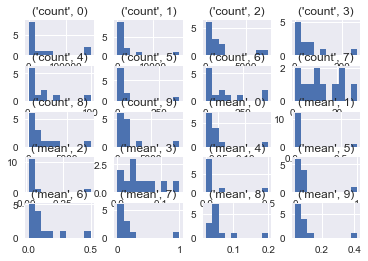

In [31]:
train.groupby(['ps_car_01_cat','ps_car_04_cat'])['target'].describe().unstack().unstack()[['mean','count']].hist()


In [ ]:
car_col_pairs = itertools.combinations(car_cols, 2)

In [ ]:
train.groupby(['ps_car_01_cat', 'ps_car_02_cat'])['target'].describe().unstack().unstack()[['mean']] > .05

mask = train.groupby(['ps_car_01_cat', 'ps_car_02_cat'])['target'].describe().unstack().unstack()[['mean']] > .05

In [ ]:
mask

In [ ]:
df = train.groupby(pair)['target'].describe().unstack().unstack()[['mean']]

In [ ]:
(df > .04).sum().sum()

Inspect top features manually

ind

    ps_ind_14 values 3 and 4
    ps_ind_05_cat value 2
    
reg

    none
    
car

    ps_car_01_cat value 9
    ps_car_04_cat value 7
    ps_car_06_cat values 2, 5, 8, 9, 13, 15, 17

In [ ]:
#train.groupby(pair)['target'].describe().unstack().unstack()[['mean']]

In [ ]:
worthwhile_pair = []

for pair in itertools.combinations(cat_cols, 2):
    df = train.groupby(pair)['target'].describe().unstack().unstack()[['count']]
    if (df > .05).sum().sum() > 1:
        worthwhile_pair.append(pair)

In [32]:
len([i for i in itertools.combinations(bin_cols, 2)])

55

In [ ]:
len(worthwhile_pair)

In [ ]:
def pair_above_target(perc,cols):
    worthwhile_pair = []

    for pair in itertools.combinations(cols, 2):
        df = train.groupby(pair)['target'].describe().unstack().unstack()[['mean']]
        if (df > perc).sum().sum() > 1:
            worthwhile_pair.append(pair)

    col_count = {}

    for pair in worthwhile_pair:
        for col in pair:
            if col in col_count:
                col_count[col] += 1
            else:
                col_count[col] = 1
    return col_count

In [ ]:
pair_above_target(.2,ord_cols)

In [ ]:
pair_above_target(.1,cat_cols)

In [ ]:
pair_above_target(.05,bin_cols)

In [ ]:
keep_cols = ['ps_car_01_cat','ps_ind_05_cat','ps_ind_17_bin']

In [ ]:
a = (train.groupby(pair)['target'].describe().unstack().unstack()[['mean']])# > .05)#.sum()


In [ ]:
b = ((train.groupby(pair)['target'].describe().unstack().unstack()[['count']]))# / len(train)))# > .05)#.sum()

In [ ]:
((train.groupby(pair)['target'].describe().unstack().unstack()[['count']] / len(train)))# > .05)#.sum()


In [ ]:
sns.heatmap(train.groupby(['ps_car_01_cat','ps_car_04_cat'])['target'].describe().unstack().unstack()[['mean']])

Modifications to features

In [ ]:
train['ps_reg_03'] = (train['ps_reg_03']*4)^2

In [ ]:
train['ps_car_12'] = train['ps_car_12']^2

In [ ]:
train['ps_car_14'] = train['ps_car_14']^2

In [ ]:
train['ps_car_15'] = train['ps_car_15']^2

In [ ]:
def hist_target(col):
    if 'cat' not in col:
        #train[col].hist()
        train.groupby([col])['target'].mean().plot(kind='barh')
        plt.figure()

In [ ]:
for col in null_cols:
    hist_target(col)

In [ ]:
# train = pd.read_csv('./data/train.csv')
# test = pd.read_csv('./data/test.csv')
col = [c for c in train.columns if c not in ['id','target']]

d_median = train.median(axis=0)
d_mean = train.mean(axis=0)
one_hot = {c: list(train[c].unique()) for c in train.columns if c not in ['id','target']}

def transform_df(df):
    df = pd.DataFrame(df)
    dcol = [c for c in df.columns if c not in ['id','target']]
    df['ps_car_13_x_ps_reg_03'] = df['ps_car_13'] * df['ps_reg_03']
    df['negative_one_vals'] = np.sum((df[dcol]==-1).values, axis=1)
    for c in dcol:
        if '_bin' not in c: #standard arithmetic
            df[c+str('_median_range')] = (df[c].values > d_median[c]).astype(np.int)
            df[c+str('_mean_range')] = (df[c].values > d_mean[c]).astype(np.int)
            #df[c+str('_sq')] = np.power(df[c].values,2).astype(np.float32)
            #df[c+str('_sqr')] = np.square(df[c].values).astype(np.float32)
            #df[c+str('_log')] = np.log(np.abs(df[c].values) + 1)
            #df[c+str('_exp')] = np.exp(df[c].values) - 1
    for c in one_hot:
        if len(one_hot[c])>2 and len(one_hot[c]) < 10:
            for val in one_hot[c]:
                df[c+'_oh_' + str(val)] = (df[c].values == val).astype(np.int)
    return df

Create scoring metric for sklearn

In [ ]:
def ginic(actual, pred):
    n = len(actual)
    a_s = actual[np.argsort(pred)]
    a_c = a_s.cumsum()
    giniSum = a_c.sum() / a_c[-1] - (n + 1) / 2.0
    return giniSum / n
 
def gini_normalizedc(a, p):
    if p.ndim == 2:
        p = p[:,1] 
    return ginic(a, p) / ginic(a, a)

In [ ]:
gini_sklearn = metrics.make_scorer(gini_normalizedc, True, True)

Split

In [ ]:
keep_cols

In [ ]:
x, y = train_spare.drop(['id','target'],axis=1), train['target']

x = x[keep_cols]

x_train, x_valid, y_train, y_valid = model_selection.train_test_split(x, y, test_size=.3)


Model

In [ ]:
rf = ensemble.RandomForestClassifier(n_estimators=400, min_samples_leaf=15, min_samples_split=20)

In [ ]:
#rf = ensemble.RandomForestClassifier(n_estimators = 800,min_samples_leaf = 10,min_samples_split=15)

In [ ]:
knn = neighbors.KNeighborsClassifier(n_neighbors=50)

In [ ]:
lr = linear_model.Lasso(.01)

In [ ]:
lg = linear_model.LogisticRegression(penalty='l1',C=.01)

Notes

    All features with rf roc of ~.62
    

In [ ]:
df = transform_df(train)

In [ ]:
rf = ensemble.RandomForestClassifier(n_estimators=400, min_samples_leaf=15, min_samples_split=20)
kfold = model_selection.KFold(n_splits=5, random_state=4)
score = model_selection.cross_val_score(rf,x_train,y_train,scoring='roc_auc',cv=kfold)
2*np.mean(score)-1

In [ ]:
rf.fit(x,y)

In [ ]:
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_],axis=0)
indices = np.argsort(importances)[::-1]

In [ ]:
def calcginiindex(array):

    array = array.flatten()
    array += 0.0000001
    array = np.sort(array)
    index = np.arange(1,array.shape[0]+1)
    n = array.shape[0]
    return ((np.sum((2*index - n - 1)*array))/(n * np.sum(array)))

Top importances

In [ ]:
keep_cols = []
for f,col in enumerate(x.columns):
    print("{}. {} {}".format(f+1, col, importances[indices[f]]))
    if importances[indices[f]] > .01:
        keep_cols.append(col)

In [ ]:
np.mean(score)*2-1

In [ ]:
%%time
rf.fit(x_train,y_train)

In [ ]:
y_pred = rf.predict_proba(x_valid)[:,1]

---
Maybe multiply by 2 to approximate the score on the LB?

In [ ]:
gini(y_valid,y_pred)*2

Grid

In [ ]:
tuned_parameters = {}
tuned_parameters['C'] = [.001,.01,.1,1,10]
tuned_parameters['penalty'] = ['l1']

In [ ]:
grid = model_selection.GridSearchCV(lg, tuned_parameters, cv=2)

In [ ]:
grid_scores = grid.fit(x_train,y_train)

Keras

In [ ]:
import keras

In [ ]:
from keras.models import Sequential()
from keras.layers import Dense, BatchNormalization, 

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=400, max_depth=8, min_samples_leaf=4, max_features=0.2, n_jobs=-1, random_state=0)
rf.fit(train.drop(['id', 'target'],axis=1), train.target)
features = train.drop(['id', 'target'],axis=1).columns.values
print("----- Training Done -----")

In [ ]:
y_pred.shape

In [ ]:
test = pd.read_csv('./data/test.csv')

In [127]:
def create_submission(rf):
    X_test = test.drop(['id'],axis=1)
    test['target'] = rf.predict_proba(X_test)[:,1]
    test[['id','target']].to_csv('./submissions/4_sub.csv',index=False, float_format='%.5f')

In [ ]:
sample = pd.read_csv('./data/sample_submission.csv',index_col=None)

In [ ]:
def gini_xgb(pred, y):
    y = y.get_label()
    return 'gini', gini(y, pred) / gini(y, y)

In [ ]:
def gini(y, pred):
    g = np.asarray(np.c_[y, pred, np.arange(len(y)) ], dtype=np.float)
    g = g[np.lexsort((g[:,2], -1*g[:,1]))]
    gs = g[:,0].cumsum().sum() / g[:,0].sum()
    gs -= (len(y) + 1) / 2.
    return gs / len(y)